In [1]:
# HiC TAD data analysis
import pandas as pd
in_TAD = pd.read_csv("/Users/qw2/Documents/Sanger/GL_analysis/32_TAD_highC_analysis/04_expression_intersect_TAD/final_in_out_bed/test_in_TAD_with_name.txt",sep="\t")
out_TAD = pd.read_csv("/Users/qw2/Documents/Sanger/GL_analysis/32_TAD_highC_analysis/04_expression_intersect_TAD/final_in_out_bed/test_out_TAD_with_name.txt",sep="\t")
TAD_merged = pd.concat([in_TAD,out_TAD])

#change the order of the column 
cols = TAD_merged.columns.tolist()
cols.insert(0, cols.pop(cols.index('LAD_end')))
cols.insert(0, cols.pop(cols.index('LAD_start')))
cols.insert(0, cols.pop(cols.index('LAD_chr')))
TAD_merged = TAD_merged.reindex(columns= cols)
TAD_merged = pd.concat([in_TAD,out_TAD])

TAD_diff_plot = TAD_merged[['_barcode','cDNA/gDNA ratio_D0_1_diff','cDNA/gDNA ratio.1_D0_2_diff', 'cDNA/gDNA ratio.2_D0_3_diff', 'cDNA/gDNA ratio.3_D0_4_diff', 'cDNA/gDNA ratio.4_D2_1_diff', 'cDNA/gDNA ratio.5_D2_2_diff', 'cDNA/gDNA ratio.6_D2_3_diff', 'cDNA/gDNA ratio.7_D2_4_diff', 'cDNA/gDNA ratio.8_D5_1_diff', 'cDNA/gDNA ratio.9_D5_2_diff', 'cDNA/gDNA ratio.10_D5_3_diff', 'cDNA/gDNA ratio.11_D5_4_diff','BC_chr', 'BC_start', 'BC_end', 'LAD_chr', 'LAD_start', 'LAD_end', 'In_or_out']].copy()
TAD_diff_plot['BC_TAD_left'] = (TAD_diff_plot['LAD_start'] - TAD_diff_plot['BC_start']).abs()
TAD_diff_plot['BC_TAD_right'] = (TAD_diff_plot['LAD_end'] - TAD_diff_plot['BC_start']).abs()
TAD_diff_plot['BC_closest_distance'] = TAD_diff_plot[['BC_TAD_left','BC_TAD_right']].min(axis=1)
TAD_diff_plot = TAD_diff_plot.drop(columns=['BC_TAD_left','BC_TAD_right'])

TAD_diff_plot_melt = TAD_diff_plot.melt(id_vars=['_barcode','BC_chr', 'BC_start', 'BC_end', 'LAD_chr', 'LAD_start', 'LAD_end', 'In_or_out','BC_closest_distance'])

import numpy as np
TAD_diff_plot_melt['group'] = "NA"

TAD_diff_plot_melt['group'] = np.where((TAD_diff_plot_melt['variable'] == 'cDNA/gDNA ratio_D0_1_diff') | 
                                 (TAD_diff_plot_melt['variable'] =='cDNA/gDNA ratio.1_D0_2_diff') | 
                                 (TAD_diff_plot_melt['variable'] =='cDNA/gDNA ratio.2_D0_3_diff') |
                                 (TAD_diff_plot_melt['variable'] =='cDNA/gDNA ratio.3_D0_4_diff'),
                                 'D0', TAD_diff_plot_melt['group'])
TAD_diff_plot_melt['group'] = np.where((TAD_diff_plot_melt['variable'] == 'cDNA/gDNA ratio.4_D2_1_diff') | 
                                 (TAD_diff_plot_melt['variable'] =='cDNA/gDNA ratio.5_D2_2_diff') | 
                                 (TAD_diff_plot_melt['variable'] =='cDNA/gDNA ratio.6_D2_3_diff') |
                                 (TAD_diff_plot_melt['variable'] =='cDNA/gDNA ratio.7_D2_4_diff'),
                                 'D2', TAD_diff_plot_melt['group'])

TAD_diff_plot_melt['group'] = np.where((TAD_diff_plot_melt['variable'] == 'cDNA/gDNA ratio.8_D5_1_diff') | 
                                 (TAD_diff_plot_melt['variable'] =='cDNA/gDNA ratio.9_D5_2_diff') | 
                                 (TAD_diff_plot_melt['variable'] =='cDNA/gDNA ratio.10_D5_3_diff') |
                                 (TAD_diff_plot_melt['variable'] =='cDNA/gDNA ratio.11_D5_4_diff'),
                                 'D5', TAD_diff_plot_melt['group'])
TAD_diff_plot_melt['value'] = TAD_diff_plot_melt['value'] + 0.00001

TAD_diff_plot_melt['rank'] = TAD_diff_plot_melt['value'].rank(method='first')
TAD_diff_plot_melt['bins'] = pd.qcut(TAD_diff_plot_melt['rank'], 8, labels=["1", "2", "3","4","5","6","7","8"])
TAD_diff_plot_melt.groupby(['bins','In_or_out']).size()

bins  In_or_out
1     in           4172
      out           213
2     in           4174
      out           210
3     in           4177
      out           208
4     in           4141
      out           243
5     in           4139
      out           245
6     in           4051
      out           334
7     in           4049
      out           335
8     in           3881
      out           504
dtype: int64

In [3]:
TAD_diff_plot_melt.head()

,_barcode,BC_chr,BC_start,BC_end,LAD_chr,LAD_start,LAD_end,In_or_out,BC_closest_distance,variable,value,group,rank,bins
0,TAGAGCGGTTAATAGCC,chr18,32472130,32472131,chr18,32160000,32560000,in,87870,cDNA/gDNA ratio_D0_1_diff,700.000010,D0,34701.0,8
1,CAAATGCTCTTGGCCTA,chr4,93395418,93395419,chr4,92280000,93800000,in,404582,cDNA/gDNA ratio_D0_1_diff,0.995035,D0,25779.0,6
2,GTTTGAGGAACTTGTGT,chr15,26271496,26271497,chr15,25320000,26880000,in,608504,cDNA/gDNA ratio_D0_1_diff,4.613620,D0,29628.0,7
3,TAGTATTTGTAGTATAA,chr13,55586856,55586857,chr13,55560000,57560000,in,26856,cDNA/gDNA ratio_D0_1_diff,6.331720,D0,30587.0,7
4,TCGATTTGCACACCGTC,chr6,121436626,121436627,chr6,121040000,122400000,in,396626,cDNA/gDNA ratio_D0_1_diff,101.996682,D0,34274.0,8


In [8]:
import scipy.stats as stats
TAD_in = TAD_diff_plot_melt.loc[TAD_diff_plot_melt['In_or_out'] == 'in']
TAD_out = TAD_diff_plot_melt.loc[TAD_diff_plot_melt['In_or_out'] == 'out']

print(stats.f_oneway(TAD_in['value'][TAD_in['group'] == 'D0'], 
             TAD_in['value'][TAD_in['group'] == 'D2'],
             TAD_in['value'][TAD_in['group'] == 'D5']))

print(stats.f_oneway(TAD_out['value'][TAD_out['group'] == 'D0'], 
             TAD_out['value'][TAD_out['group'] == 'D2'],
             TAD_out['value'][TAD_out['group'] == 'D5']))

F_onewayResult(statistic=0.6627475610868159, pvalue=0.5154401091400209)
F_onewayResult(statistic=3.0888330145684724, pvalue=0.04574501973245555)


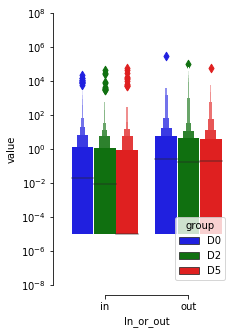

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 5))

test = sns.boxenplot(x="In_or_out", y="value",
            hue="group", palette=["b", "g", "r"],
            data=TAD_diff_plot_melt)
test.set_yscale('log')

test.set(ylim=(0.00000001, 100000000))
sns.despine(offset=10, trim=True)

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


[(-0.2, 1.2)]

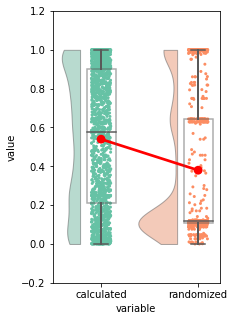

In [20]:
# Test the correlation / linear regression analysis for the 3 time points within a TAD, compare to the correlation / regression with the permutation data

from itertools import combinations
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr 

in_TAD = pd.read_csv("/Users/qw2/Documents/Sanger/GL_analysis/32_TAD_highC_analysis/04_expression_intersect_TAD/final_in_out_bed/test_in_TAD_with_name.txt",sep="\t")
out_TAD = pd.read_csv("/Users/qw2/Documents/Sanger/GL_analysis/32_TAD_highC_analysis/04_expression_intersect_TAD/final_in_out_bed/test_out_TAD_with_name.txt",sep="\t")
TAD_merged = pd.concat([in_TAD,out_TAD])
TAD_diff_plot = TAD_merged[['_barcode','cDNA/gDNA ratio_D0_1_diff','cDNA/gDNA ratio.1_D0_2_diff', 'cDNA/gDNA ratio.2_D0_3_diff', 'cDNA/gDNA ratio.3_D0_4_diff', 'cDNA/gDNA ratio.4_D2_1_diff', 'cDNA/gDNA ratio.5_D2_2_diff', 'cDNA/gDNA ratio.6_D2_3_diff', 'cDNA/gDNA ratio.7_D2_4_diff', 'cDNA/gDNA ratio.8_D5_1_diff', 'cDNA/gDNA ratio.9_D5_2_diff', 'cDNA/gDNA ratio.10_D5_3_diff', 'cDNA/gDNA ratio.11_D5_4_diff','BC_chr', 'BC_start', 'BC_end', 'LAD_chr', 'LAD_start', 'LAD_end', 'In_or_out']].copy()

# group all the barcodes by the TADs and filter out the one only 1BC per TAD
TAD_diff_plot['count'] = TAD_diff_plot.groupby(['LAD_chr','LAD_start','LAD_end'])['_barcode'].transform("count")

# drop all the rows the BC in TAD is only 1
TAD_diff_plot_filter = TAD_diff_plot.loc[TAD_diff_plot['count'] > 1]
TAD_diff_plot_in = TAD_diff_plot_filter[TAD_diff_plot_filter['In_or_out'] == "in"]
TAD_diff_plot_out = TAD_diff_plot_filter[TAD_diff_plot_filter['In_or_out'] == "out"]

TAD_in_groupedby_TAD = TAD_diff_plot_in.groupby(['LAD_chr','LAD_start','LAD_end']).size().reset_index(name='size').reset_index()
TAD_diff_plot_in_with_TAD = pd.merge(TAD_in_groupedby_TAD, TAD_diff_plot_in, on = ['LAD_chr','LAD_start','LAD_end'])

# sub the dataframe based on the index into the small dataframe within the same TAD
combination_regression = []
BC_in_TAD = []
for i in TAD_diff_plot_in_with_TAD.iloc[:,0].unique():
    df = TAD_diff_plot_in_with_TAD.loc[TAD_diff_plot_in_with_TAD['index'] == i]
    BC_in_TAD.append(len(df.index))
    # make all the 2 sample combination within the sub_df 
    for index in list(combinations(df.index,2)):
        sub_df = df.loc[index,:]
        # calculate the BC1 D0/D2/D5 BC mean
        BC1_D0 = sub_df.iloc[0,6:10].mean()+ 0.00001
        BC1_D2 = sub_df.iloc[0,10:14].mean()+ 0.00001
        BC1_D5 = sub_df.iloc[0,14:18].mean()+ 0.00001
        BC2_D0 = sub_df.iloc[1,6:10].mean()+ 0.00001
        BC2_D2 = sub_df.iloc[1,10:14].mean()+ 0.00001
        BC2_D5 = sub_df.iloc[1,14:18].mean()+ 0.00001
        # calculate the regression score
        BC1 = [BC1_D0,BC1_D2,BC1_D5]
        BC2 = [BC2_D0,BC2_D2,BC2_D5]
        # calculate Pearson's correlation
        corr = pearsonr(BC1, BC2)
        combination_regression.append(corr[0]**2)

# calculate the number of BC in each TAD, extract according to the number of BC in TAD,
# calculate all the permutations of correlation R2, compare with the calculated r2
random_regression = []
for count in BC_in_TAD:
    random_sub = TAD_diff_plot_in_with_TAD.sample(n=count, replace=False,random_state=42)
    for index in list(combinations(random_sub.index,2)):
        sub_df = random_sub.loc[index,:]
        # calculate the BC1 D0/D2/D5 BC mean
        BC1_D0 = sub_df.iloc[0,6:10].mean()+ 0.00001
        BC1_D2 = sub_df.iloc[0,10:14].mean()+ 0.00001
        BC1_D5 = sub_df.iloc[0,14:18].mean()+ 0.00001
        BC2_D0 = sub_df.iloc[1,6:10].mean()+ 0.00001
        BC2_D2 = sub_df.iloc[1,10:14].mean()+ 0.00001
        BC2_D5 = sub_df.iloc[1,14:18].mean()+ 0.00001
        # calculate the regression score
        BC1 = [BC1_D0,BC1_D2,BC1_D5]
        BC2 = [BC2_D0,BC2_D2,BC2_D5]
        # calculate Pearson's correlation
        corr = pearsonr(BC1, BC2)
        random_regression.append(corr[0]**2)

plot_correlation = pd.DataFrame(columns=['calculated', 'randomized'])
plot_correlation['calculated'] = combination_regression
plot_correlation['randomized'] = random_regression
plot_correlation = plot_correlation.reset_index()
plot_corr_final = plot_correlation.melt(id_vars = ["index"])

import ptitprince as pt
import matplotlib.pyplot as plt
correlation_plot = pt.RainCloud(x="variable", y="value", data=plot_corr_final,
                   width_viol = .8,
                   width_box = .3,
                   figsize = (3, 5),
                   move = .0,alpha = .5,bw = .2,
                   pointplot=True)
correlation_plot.set(ylim=(-0.2, 1.2))

In [15]:
plot_correlation.head()

,index,calculated,randomized
0,0,0.436197,NaN
1,1,0.976116,NaN
2,2,0.702398,NaN
3,3,0.670028,0.109243
4,4,0.820556,0.999755


In [26]:
from scipy import stats
scipy.stats.ttest_ind(plot_correlation.dropna()['calculated'], plot_correlation.dropna()['randomized'], axis=0,equal_var=False)

Ttest_indResult(statistic=6.598508544077081, pvalue=7.174983527235614e-11)